## Task H

In [3]:
import numpy as np
import matplotlib.pyplot as plt

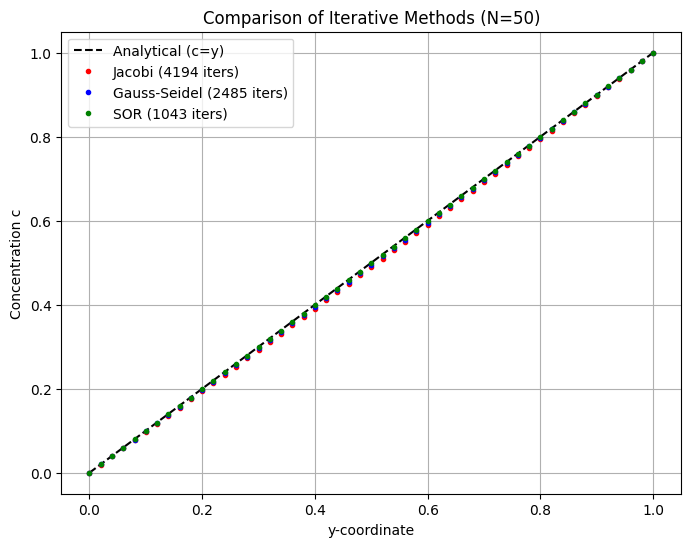

In [4]:
def initialize_grid(N):
    """Initializes the grid with boundary conditions."""
    c = np.zeros((N + 1, N + 1))
    c[N, :] = 1.0  # Top boundary (y=1)
    c[0, :] = 0.0  # Bottom boundary (y=0)
    return c

def apply_periodic_bc(c):
    """Applies periodic boundary conditions in the x-direction."""
    # c[j, 0] = c[j, N] (left = right)
    c[:, 0] = c[:, -2]
    c[:, -1] = c[:, 1]
    return c

def jacobi_method(N, epsilon=1e-5, max_iter=100000):
    c = initialize_grid(N)
    for k in range(max_iter):
        c_new = c.copy()
        # Update interior points using the 5-point stencil in a new matrix
        c_new[1:N, 1:N] = 0.25 * (c[1:N, 2:] + c[1:N, :-2] + 
                                  c[2:, 1:N] + c[:-2, 1:N])
        
        c_new = apply_periodic_bc(c_new)
        delta = np.max(np.abs(c_new - c))
        c = c_new
        if delta < epsilon:
            return c, k
    return c, max_iter

def gauss_seidel_method(N, epsilon=1e-5, max_iter=100000):
    c = initialize_grid(N)
    for k in range(max_iter):
        delta = 0.0
        # Gauss-Seidel updates in-place
        for j in range(1, N):
            for i in range(1, N):
                old_val = c[j, i]
                # Uses new values as soon as they are calculated
                c[j, i] = 0.25 * (c[j, i+1] + c[j, i-1] + c[j+1, i] + c[j-1, i])
                delta = max(delta, abs(c[j, i] - old_val))
        
        c = apply_periodic_bc(c)
        if delta < epsilon:
            return c, k
    return c, max_iter

def sor_method(N, omega, epsilon=1e-5, max_iter=100000):
    c = initialize_grid(N)
    for k in range(max_iter):
        delta = 0.0
        for j in range(1, N):
            for i in range(1, N):
                old_val = c[j, i]
                gs_val = 0.25 * (c[j, i+1] + c[j, i-1] + c[j+1, i] + c[j-1, i])
                c[j, i] = omega * gs_val + (1 - omega) * old_val
                delta = max(delta, abs(c[j, i] - old_val))
        
        c = apply_periodic_bc(c)
        if delta < epsilon:
            return c, k
    return c, max_iter

N = 50
y_coords = np.linspace(0, 1, N + 1)
analytical = y_coords  # linear dependence c(y) = y

# Run solvers
c_jacobi, iter_j = jacobi_method(N)
c_gs, iter_gs = gauss_seidel_method(N)
# Using recommended omega for N=50
c_sor, iter_sor = sor_method(N, omega=1.5)

# Comparing results
profile_idx = N // 2
plt.figure(figsize=(8, 6))
plt.plot(y_coords, analytical, 'k--', label='Analytical (c=y)')
plt.plot(y_coords, c_jacobi[:, profile_idx], 'r.', label=f'Jacobi ({iter_j} iters)')
plt.plot(y_coords, c_gs[:, profile_idx], 'b.', label=f'Gauss-Seidel ({iter_gs} iters)')
plt.plot(y_coords, c_sor[:, profile_idx], 'g.', label=f'SOR ({iter_sor} iters)')
plt.xlabel('y-coordinate')
plt.ylabel('Concentration c')
plt.title(f'Comparison of Iterative Methods (N={N})')
plt.legend()
plt.grid(True)
plt.show()

## Task I

<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:67: SyntaxWarning: invalid escape sequence '\o'
<>:68: SyntaxWarning: invalid escape sequence '\o'
<>:71: SyntaxWarning: invalid escape sequence '\d'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:67: SyntaxWarning: invalid escape sequence '\o'
<>:68: SyntaxWarning: invalid escape sequence '\o'
<>:71: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sofro\AppData\Local\Temp\ipykernel_29232\1665876104.py:66: SyntaxWarning: invalid escape sequence '\o'
  plt.semilogy(hist_sor_15, label='SOR ($\omega=1.5$)')
C:\Users\sofro\AppData\Local\Temp\ipykernel_29232\1665876104.py:67: SyntaxWarning: invalid escape sequence '\o'
  plt.semilogy(hist_sor_18, label='SOR ($\omega=1.8$)')
C:\Users\sofro\AppData\Local\Temp\ipykernel_29232\1665876104.py:68: SyntaxWarning: invalid escape sequence '\o'
  plt.semilogy(hist_sor_19, label='SOR ($\omega=1.9$)')
C:\Users\sofro\AppData\Local\Temp\ipykernel_29232\1665876104.py:71: SyntaxWarning: inval

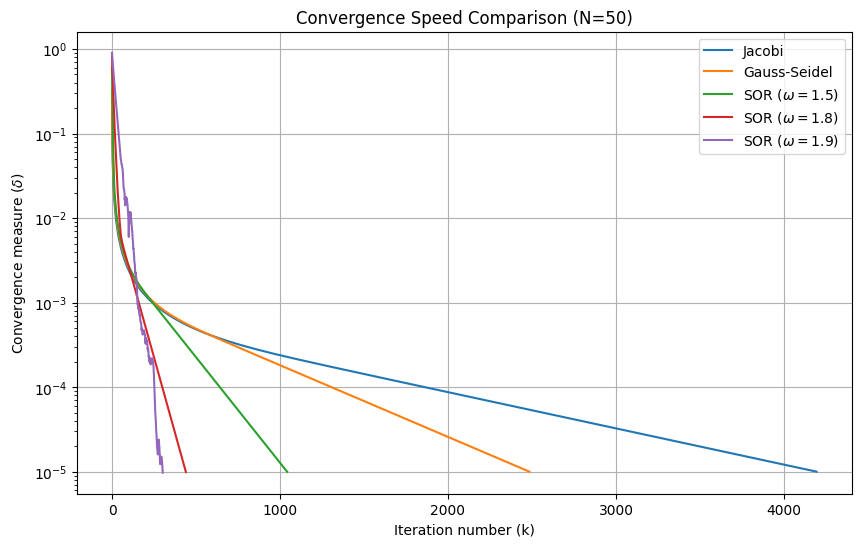

In [5]:
# Same methods but with convergence history
def jacobi_method(N, epsilon=1e-5, max_iter=100000):
    c = initialize_grid(N)
    history = [] 
    for k in range(max_iter):
        c_new = c.copy()
        c_new[1:N, 1:N] = 0.25 * (c[1:N, 2:] + c[1:N, :-2] + 
                                  c[2:, 1:N] + c[:-2, 1:N])
        c_new = apply_periodic_bc(c_new)
        delta = np.max(np.abs(c_new - c))
        history.append(delta) 
        c = c_new
        if delta < epsilon:
            return c, history
    return c, history

def gauss_seidel_method(N, epsilon=1e-5, max_iter=100000):
    c = initialize_grid(N)
    history = [] 
    for k in range(max_iter):
        delta = 0.0
        for j in range(1, N):
            for i in range(1, N):
                old_val = c[j, i]
                c[j, i] = 0.25 * (c[j, i+1] + c[j, i-1] + c[j+1, i] + c[j-1, i])
                delta = max(delta, abs(c[j, i] - old_val))
        
        c = apply_periodic_bc(c)
        history.append(delta) 
        if delta < epsilon:
            return c, history
    return c, history

def sor_method(N, omega, epsilon=1e-5, max_iter=100000):
    c = initialize_grid(N)
    history = []
    for k in range(max_iter):
        delta = 0.0
        for j in range(1, N):
            for i in range(1, N):
                old_val = c[j, i]
                gs_val = 0.25 * (c[j, i+1] + c[j, i-1] + c[j+1, i] + c[j-1, i])
                c[j, i] = omega * gs_val + (1 - omega) * old_val
                delta = max(delta, abs(c[j, i] - old_val))
        
        c = apply_periodic_bc(c)
        history.append(delta)
        if delta < epsilon:
            return c, history
    return c, history


N = 50

# Collect histories
_, hist_jacobi = jacobi_method(N)
_, hist_gs = gauss_seidel_method(N)
_, hist_sor_15 = sor_method(N, omega=1.5)
_, hist_sor_18 = sor_method(N, omega=1.8)
_, hist_sor_19 = sor_method(N, omega=1.9)

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogy(hist_jacobi, label='Jacobi')
plt.semilogy(hist_gs, label='Gauss-Seidel')
plt.semilogy(hist_sor_15, label='SOR ($\omega=1.5$)')
plt.semilogy(hist_sor_18, label='SOR ($\omega=1.8$)')
plt.semilogy(hist_sor_19, label='SOR ($\omega=1.9$)')

plt.xlabel('Iteration number (k)')
plt.ylabel('Convergence measure ($\delta$)')
plt.title(f'Convergence Speed Comparison (N={N})')
plt.legend()
plt.grid(True)
plt.show()

## Task J

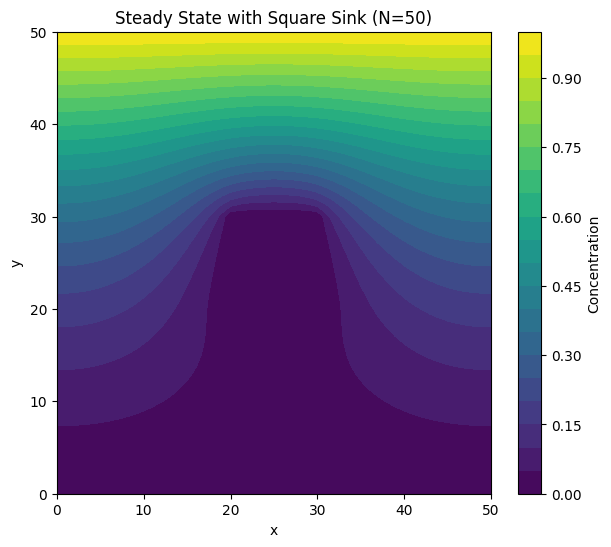

In [6]:
def initialize_grid(N, object_mask=None):
    c = np.zeros((N + 1, N + 1))
    c[N, :] = 1.0  # Top boundary
    c[0, :] = 0.0  # Bottom boundary
    if object_mask is not None:
        c[object_mask] = 0.0
    return c

def sor_method_with_object(N, omega, object_mask=None, epsilon=1e-5, max_iter=100000):
    c = initialize_grid(N, object_mask)
    for k in range(max_iter):
        delta = 0.0
        for j in range(1, N):
            for i in range(1, N):
                # Skip updates if this point is part of the sink object
                if object_mask is not None and object_mask[j, i]:
                    continue
                
                old_val = c[j, i]
                gs_val = 0.25 * (c[j, i+1] + c[j, i-1] + c[j+1, i] + c[j-1, i])
                c[j, i] = omega * gs_val + (1 - omega) * old_val
                delta = max(delta, abs(c[j, i] - old_val))
        
        c = apply_periodic_bc(c)
        if delta < epsilon:
            return c, k
    return c, max_iter

# Finding Optimal Omega vs N
def find_optimal_omega(N):
    plt.figure(figsize=(5, 3))
    
    # Range of omega from 1.0 to 1.99
    omegas = np.linspace(1.0, 1.99, 20)
    iterations = []
    
    for w in omegas:
        _, iters = sor_method_with_object(N, omega=w)
        iterations.append(iters)
    
    # Plotting the convergence curve
    plt.plot(omegas, iterations, marker='o', linestyle='-', color='b', label=f'N={N}')
    
    # Identifying the optimal omega
    idx_min = np.argmin(iterations)
    opt_w = omegas[idx_min]
    min_iters = iterations[idx_min]
    
    # Highlighting the optimal point
    plt.annotate(f'Optimal: {opt_w:.2f}', 
                 xy=(opt_w, min_iters), 
                 xytext=(opt_w, min_iters * 1.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    print(f"Optimal omega for N={N} is approximately {opt_w:.2f}")

    # Formatting the chart
    plt.xlabel(r'$\omega$ (Relaxation Factor)')
    plt.ylabel('Iterations to Converge')
    plt.title(f'SOR Method: Omega vs. Iterations (N={N})')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", alpha=0.5)
    plt.legend()
    plt.show()

N = 50
# Define a square object in the middle (indices from 20 to 30)
obj_mask = np.zeros((N + 1, N + 1), dtype=bool)
obj_mask[20:31, 20:31] = True

# Solve with the optimal omega found for N=50
c_final, iters = sor_method_with_object(N, omega=1.85, object_mask=obj_mask)

# Plotting the result
plt.figure(figsize=(7, 6))
plt.contourf(c_final, levels=20, cmap='viridis')
plt.colorbar(label='Concentration')
plt.title(f'Steady State with Square Sink (N={N})')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


C:\Users\sofro\AppData\Local\Temp\ipykernel_43324\3399129345.py:22: RuntimeWarning: overflow encountered in scalar subtract
  delta = max(delta, abs(c[j, i] - old_val))
C:\Users\sofro\AppData\Local\Temp\ipykernel_43324\3399129345.py:20: RuntimeWarning: overflow encountered in scalar add
  gs_val = 0.25 * (c[j, i+1] + c[j, i-1] + c[j+1, i] + c[j-1, i])
C:\Users\sofro\AppData\Local\Temp\ipykernel_43324\3399129345.py:21: RuntimeWarning: invalid value encountered in scalar add
  c[j, i] = omega * gs_val + (1 - omega) * old_val
C:\Users\sofro\AppData\Local\Temp\ipykernel_43324\3399129345.py:20: RuntimeWarning: invalid value encountered in scalar add
  gs_val = 0.25 * (c[j, i+1] + c[j, i-1] + c[j+1, i] + c[j-1, i])


Optimal omega for N=20 is approximately 1.78


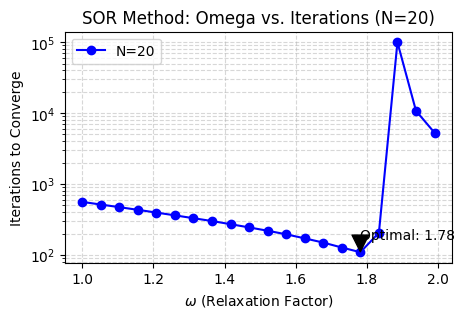

C:\Users\sofro\AppData\Local\Temp\ipykernel_43324\3399129345.py:21: RuntimeWarning: overflow encountered in scalar add
  c[j, i] = omega * gs_val + (1 - omega) * old_val


Optimal omega for N=30 is approximately 1.83


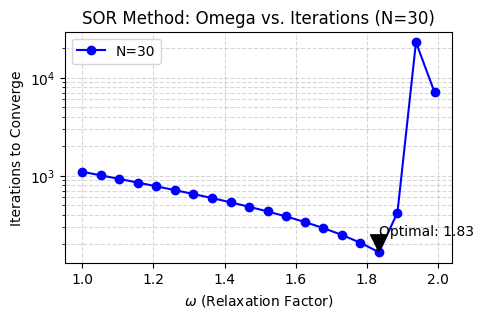

Optimal omega for N=40 is approximately 1.83


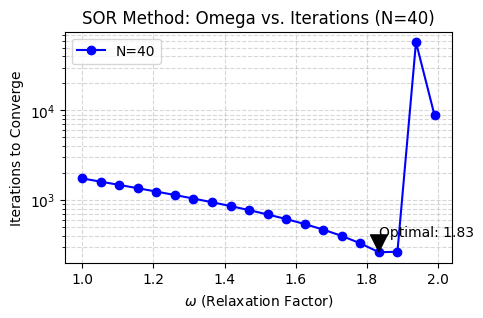

Optimal omega for N=50 is approximately 1.89


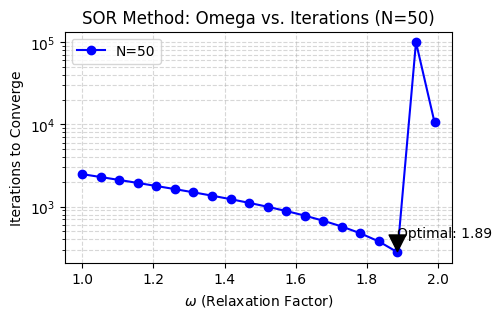

In [21]:
find_optimal_omega(20)
find_optimal_omega(30)
find_optimal_omega(40)
find_optimal_omega(50)

## Task K

In [7]:
def create_rect_mask(N, num_rects):
    mask = np.zeros((N, N), dtype=int)
    # Define some arbitrary but consistent rectangle coordinates
    coords = [
        (0.4, 0.6, 0.4, 0.6), # Center Square
        (0.1, 0.3, 0.1, 0.3), # Top Left
        (0.7, 0.9, 0.7, 0.9), # Bottom Right
        (0.1, 0.3, 0.7, 0.9)  # Top Right
    ]
    
    for i in range(min(num_rects, len(coords))):
        y1, y2, x1, x2 = coords[i]
        mask[int(y1*N):int(y2*N), int(x1*N):int(x2*N)] = 1
    return mask

def sor_method_with_object(N, omega, mask, tol=1e-5, max_iter=10000):
    # Initialize the grid (U) with zeros
    U = np.zeros((N, N))
    U[0, :] = 1.0 # Top boundary condition (y=1)
    
    # Ensure the mask is applied to the initial state
    U[mask == 1] = 0
    
    for iters in range(max_iter):
        old_U = U.copy()
        max_diff = 0.0
        
        # Internal grid points only
        for i in range(1, N-1):
            for j in range(1, N-1):
                # Check if this point is part of an object (sink)
                if mask[i, j] == 1:
                    U[i, j] = 0 # Keep sink at zero
                    continue    # Skip the SOR update
                
                # Standard SOR Update Rule
                res = (U[i+1, j] + U[i-1, j] + U[i, j+1] + U[i, j-1]) / 4.0 - U[i, j]
                U[i, j] = U[i, j] + omega * res
                
                # Track convergence
                diff = abs(U[i, j] - old_U[i, j])
                if diff > max_diff:
                    max_diff = diff
        
        # Check for convergence
        if max_diff < tol:
            return U, iters
            
    return U, max_iter


<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:31: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:31: SyntaxWarning: invalid escape sequence '\o'
C:\Users\sofro\AppData\Local\Temp\ipykernel_43324\3859280897.py:27: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(omegas, iterations_needed, label=f'{name} (Opt $\omega ≈$ {opt_w:.2f})')
C:\Users\sofro\AppData\Local\Temp\ipykernel_43324\3859280897.py:31: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\omega$ (Relaxation Factor)')


Scenario        | Max Iters (w=1.0)  | Min Iters  | Opt Omega 
------------------------------------------------------------
1 Rectangle     | 565                | 73         | 1.83
2 Rectangles    | 509                | 59         | 1.79
3 Rectangles    | 503                | 57         | 1.79
4 Rectangles    | 303                | 45         | 1.75


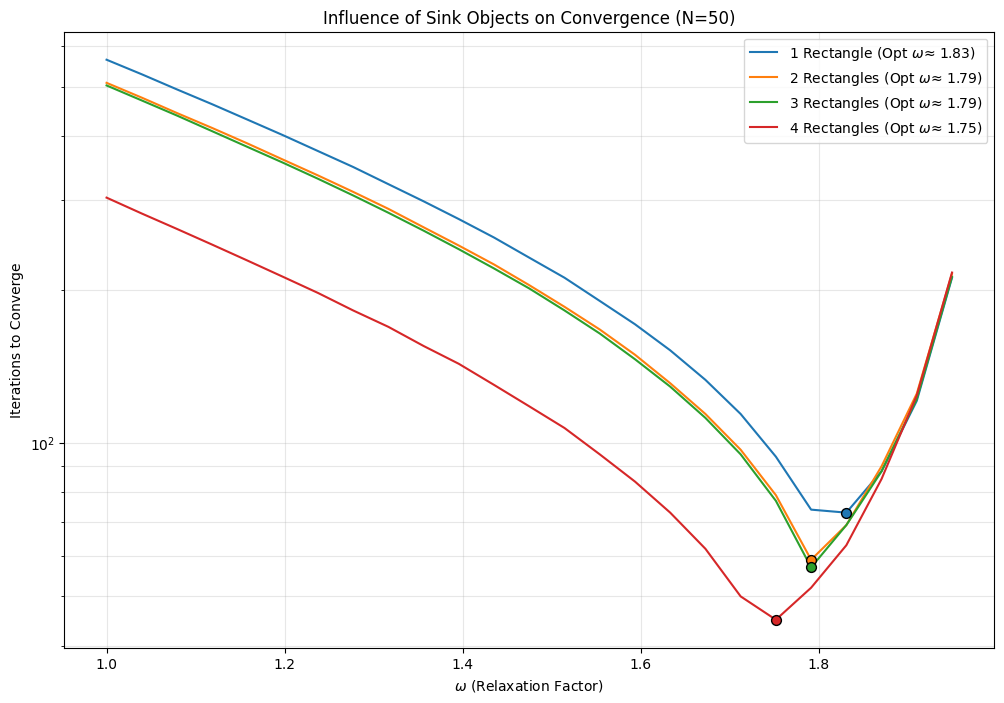

In [29]:
def run_experiments(N):
    scenario_names = ["1 Rectangle", "2 Rectangles", "3 Rectangles", "4 Rectangles"]
    omegas = np.linspace(1.0, 1.95, 25) 
    
    plt.figure(figsize=(12, 8))
    
    print(f"{'Scenario':<15} | {'Max Iters (w=1.0)':<18} | {'Min Iters':<10} | {'Opt Omega':<10}")
    print("-" * 60)
    
    for i, name in enumerate(scenario_names):
        mask = create_rect_mask(N, i + 1)
        iterations_needed = []
        
        for w in omegas:
            _, iters = sor_method_with_object(N, omega=w, mask=mask)
            iterations_needed.append(iters)
        
        # Data for this specific scenario
        max_iters = iterations_needed[0]  # First value is w=1.0
        min_iters = np.min(iterations_needed)
        opt_w = omegas[np.argmin(iterations_needed)]
        
        # Print scenario summary
        print(f"{name:<15} | {max_iters:<18} | {min_iters:<10} | {opt_w:.2f}")
        
        # Plotting
        plt.plot(omegas, iterations_needed, label=f'{name} (Opt $\omega ≈$ {opt_w:.2f})')
        plt.scatter(opt_w, min_iters, s=50, edgecolors='black', zorder=5)

    plt.title(f'Influence of Sink Objects on Convergence (N={N})')
    plt.xlabel('$\omega$ (Relaxation Factor)')
    plt.ylabel('Iterations to Converge')
    plt.yscale('log')
    plt.grid(True, which="both", alpha=0.3)
    plt.legend()
    plt.show()

# Run the experiment
run_experiments(N=50)

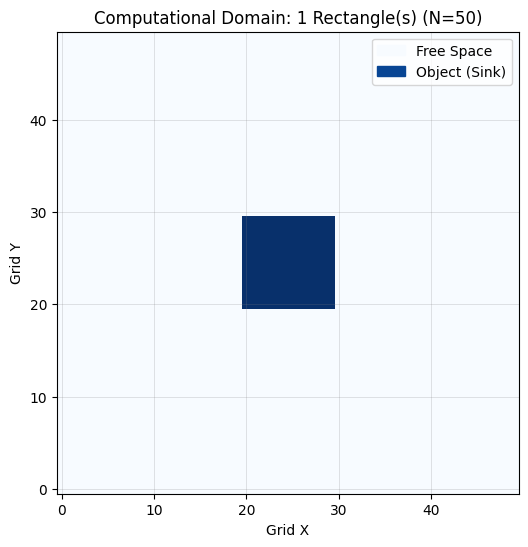

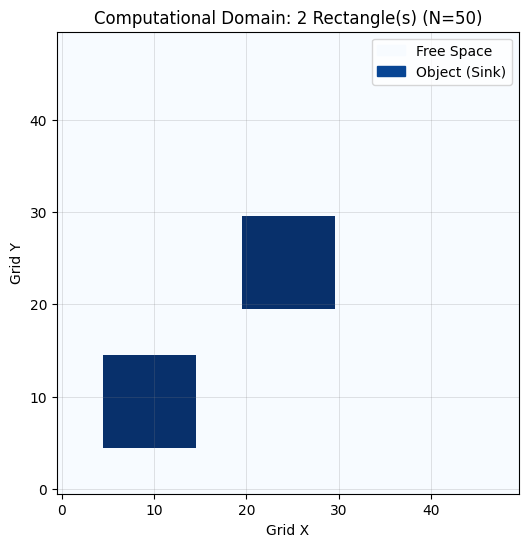

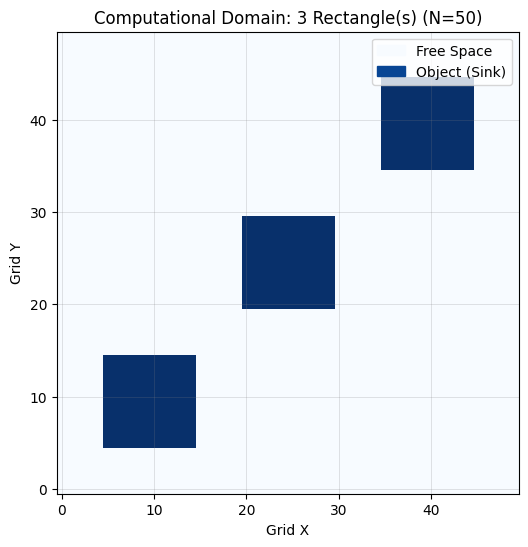

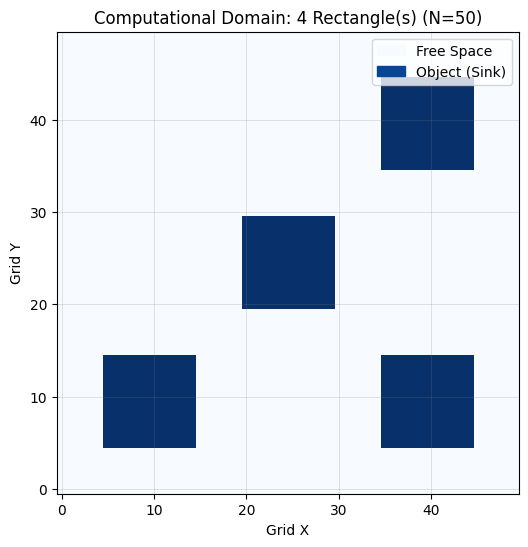

In [ ]:
def visualize_objects(N, num_rects):
    # Generate the mask
    mask = create_rect_mask(N, num_rects)
    
    plt.figure(figsize=(6, 6))
    
    # Plotting the mask
    plt.imshow(mask, cmap='Blues', origin='lower')
    
    plt.title(f'Computational Domain: {num_rects} Rectangle(s) (N={N})')
    plt.xlabel('Grid X')
    plt.ylabel('Grid Y')
    
    # Adding a grid to see individual cells
    plt.grid(which='both', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    
    import matplotlib.patches as mpatches
    blue_patch = mpatches.Patch(color='#084594', label='Object (Sink)')
    white_patch = mpatches.Patch(color='#f7fbff', label='Free Space')
    plt.legend(handles=[white_patch, blue_patch], loc='upper right')
    
    plt.show()

visualize_objects(N=50, num_rects=1)
visualize_objects(N=50, num_rects=2)
visualize_objects(N=50, num_rects=3)
visualize_objects(N=50, num_rects=4)

## Task L

(Sink) Iterations: 53
(Insulator) Iterations: 216


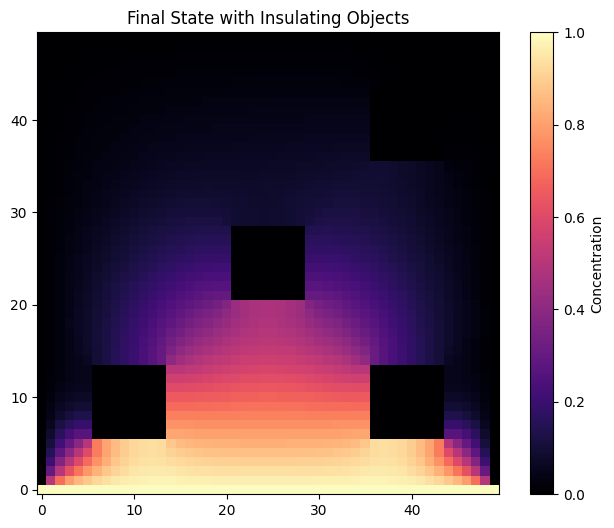

In [10]:
def sor_method_insulator(N, omega, mask, tol=1e-5, max_iter=10000):
    U = np.zeros((N, N))
    U[0, :] = 1.0  # Top boundary
    
    # Pre-calculate where the fluid points are
    is_fluid = (mask == 0)
    
    for iters in range(max_iter):
        old_U = U.copy()
        max_diff = 0.0
        
        # Update Fluid Points using SOR
        for i in range(1, N-1):
            for j in range(1, N-1):
                if is_fluid[i, j]:
                    # Standard 5-point stencil SOR
                    res = (U[i+1, j] + U[i-1, j] + U[i, j+1] + U[i, j-1]) / 4.0 - U[i, j]
                    U[i, j] = U[i, j] + omega * res
    
        # Each object point takes the value of its nearest fluid neighbor to ensure the gradient across the boundary is zero
        for i in range(1, N-1):
            for j in range(1, N-1):
                if mask[i, j] == 1:
                    # Look at neighbors if neighbor is fluid, copy its value
                    neighbor_sum = 0
                    count = 0
                    for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
                        if is_fluid[i+di, j+dj]:
                            neighbor_sum += U[i+di, j+dj]
                            count += 1
                    
                    if count > 0:
                        U[i, j] = neighbor_sum / count
        
        # Check convergence on fluid points
        max_diff = np.max(np.abs(U[is_fluid] - old_U[is_fluid]))
        if max_diff < tol:
            return U, iters
            
    return U, max_iter

# Experiment
N=50
mask = create_rect_mask(N, 4)
omega = 1.8

U_sink, iters_sink = sor_method_with_object(N, omega, mask) 
U_insul, iters_insul = sor_method_insulator(N, omega, mask)

print(f"(Sink) Iterations: {iters_sink}")
print(f"(Insulator) Iterations: {iters_insul}")

# Visualize Task L Result
plt.figure(figsize=(8, 6))
plt.imshow(U_insul, cmap='magma', origin='lower')
plt.colorbar(label='Concentration')
plt.title("Final State with Insulating Objects")
plt.show()
